# Task 09 - Support Vector Machines (SVM) for Non-linear Classification
## Pattern Recognition and Machine Learning

In [ ]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from svm import *
import numpy as np
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)

# Part 1: Kernel SVM
## Test on trivial data

In [ ]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

### get_kernel function

In [ ]:
K = get_kernel(X, X, {'kernel': 'linear'})
print(K)

In [ ]:
plt.imshow(K, cmap='viridis')
plt.title('Linear kernel');

In [ ]:
K = get_kernel(X, X, {'kernel': 'polynomial', 'd': 2})
print(K)

In [ ]:
plt.imshow(K, cmap='viridis')
plt.title('Polynomial kernel');

In [ ]:
K = get_kernel(X, X, {'kernel': 'rbf', 'sigma': 1.0})
np.set_printoptions(precision=4, suppress=True)
print(K)
np.set_printoptions()

In [ ]:
plt.imshow(K, cmap='viridis')
plt.title('RBF kernel');

### The SVM function

In [ ]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([-1, 1, 1, 1, -1, -1])
C = float('inf');
options = {'verb': True, 
           't_max': float(100),
           'kernel': 'rbf',
           'sigma': 0.02}

In [ ]:
model = svm(X, y, C, options)
print(model)

In [ ]:
classif = classif_svm(X, model)
print(classif)

In [ ]:
plt.gca().set_aspect("equal")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plot_boundary(plt.gca(), model)
plot_points(X, y)
plt.title('Kernel SVM')
plt.savefig('kernel_svm.png', dpi=300)

## Soft-margin hyperparameter C

In [ ]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([1, 1, 1, -1, -1, -1])
C = np.inf
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'linear'}
 
model = svm(X, y, C, options)
plot_points(X, y)
plot_boundary(plt.gca(), model)
plt.gca().set_aspect("equal")
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.savefig('example_linear_svm_zero_error.png', dpi=600)

In [ ]:
data = np.load("data_svm1.npz", allow_pickle=True)
X_toy = data["X"]
y_toy = data["y"]

In [ ]:
C = np.inf
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'linear'}
model = svm(X_toy, y_toy, C, options=options)
plot_points(X_toy, y_toy)
plot_boundary(plt.gca(), model)
plt.gca().set_aspect("equal")
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.savefig('linear_svm_zero_error.png', dpi=600)

In [ ]:
C = 1
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'linear'}
model = svm(X_toy, y_toy, C, options=options)
plot_points(X_toy, y_toy)
plot_boundary(plt.gca(), model)
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.gca().set_aspect("equal")
plt.savefig('linear_svm.png', dpi=600)

### Interactive C demo

In [ ]:
try:
    from ipywidgets import interact, interactive, fixed
    
    @interact(C=(0.001,100.,0.001))
    def soft_margin(C=1):
        model = svm(X_toy, y_toy, C, options={'verb': False,
                                              't_max': float('inf'),
                                              'kernel': 'linear'})
        plt.gca().set_aspect("equal")
        plot_points(X_toy, y_toy)
        plot_boundary(plt.gca(), model)
        plt.title('Soft-margin SVM, C = {}'.format(C));
        
except ImportError:
    print('Optional feature.')

## Comparing different kernels - test on flower data

In [ ]:
data = np.load("flower.npz", allow_pickle=True)
X = data["X"]
y = data["y"]

### RBF

In [ ]:
C = 10
sigma = 0.1
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'rbf', 
           'sigma': sigma}
 
model = svm(X, y, C, options)
print(model)

In [ ]:
plot_points(X, y)
plt.title('RBF kernel $\sigma$={}'.format(sigma))
plt.gca().set_aspect("equal")
plot_boundary(plt.gca(), model)
plt.savefig('flower_rbf.png', dpi=300)

### Polynomial

In [ ]:
C = 10000
d = 4
options = {'verb': False, 
           't_max': float('inf'), 
           'kernel': 'polynomial', 
           'd': d}
 
model = svm(X, y, C, options)

In [ ]:
plot_points(X, y)
plt.gca().set_aspect("equal")
plt.title('Polynomial kernel $d$={}'.format(d))
plot_boundary(plt.gca(), model)
plt.savefig('flower_polynomial.png', dpi=300)

# Part 2: Model selection

In [105]:
data = np.load("data_svm1_images.npz", allow_pickle=True)
trn_data = data["trn"].item()
tst_data = data["tst"].item()

X_trn, y_trn, norm_trn = compute_measurements_2d(trn_data)
X_tst, y_tst, _ = compute_measurements_2d(tst_data, norm_trn)

In [108]:
np.random.seed(42)
trn_folds, tst_folds = crossval(y_trn.size, num_folds=4)
Cs = [0.001, 0.1, 1, 10]
ds = [1, 3, 5]

best_params = None
best_err = np.inf
for C in Cs:
    for d in ds:
        options = {'verb': False, 't_max': 100000,
                  'kernel': 'polynomial', 'd': d}
        err = svm_crossvalidation(trn_folds, tst_folds, X_trn, y_trn, C, options)

        if err < best_err:
            best_err = err
            best_params = (C, d)
        print('C {}, d {} -> err {}'.format(C, d, err))

print('best params: C={}, d={}'.format(best_params[0], best_params[1]))

C 0.001, d 1 -> err 0.08944444444444445
C 0.001, d 3 -> err 0.09777777777777777
C 0.001, d 5 -> err 0.09166666666666667
C 0.1, d 1 -> err 0.07444444444444445
C 0.1, d 3 -> err 0.07722222222222222
C 0.1, d 5 -> err 0.215
C 1, d 1 -> err 0.07277777777777777
C 1, d 3 -> err 0.08
C 1, d 5 -> err 0.3094444444444444
C 10, d 1 -> err 0.07444444444444445
C 10, d 3 -> err 0.2461111111111111
C 10, d 5 -> err 0.33499999999999996
best params: C=1, d=1


In [109]:
C = best_params[0]
d = best_params[1]

options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'polynomial', 
           'd': d}
model = svm(X_trn, y_trn, C, options)

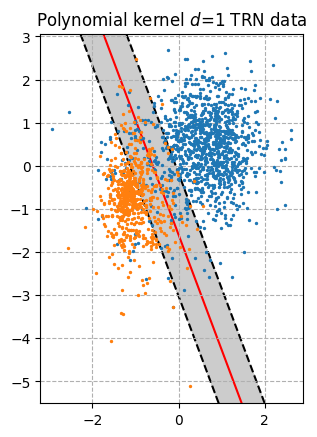

In [110]:
plot_points(X_trn, y_trn, size=2)
plt.gca().set_aspect("equal")
plt.grid(linestyle='--')
plt.title('Polynomial kernel $d$={} TRN data'.format(d))
plot_boundary(plt.gca(), model, plot_support_vectors=False)
plt.savefig('ocr_polynomial_kernel_trn.png', dpi=300)

In [111]:
classif = classif_svm(X_tst, model)
err = np.mean(classif != y_tst)
print(err)

0.045


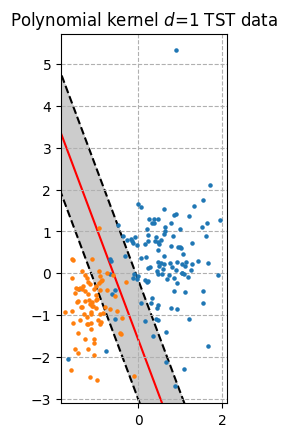

In [112]:
plt.gca().set_aspect("equal")
plot_points(X_tst, y_tst, size=5)
plt.gca().relim()
plt.grid(linestyle='--')
plt.title('Polynomial kernel $d$={} TST data'.format(d))
plot_boundary(plt.gca(), model, plot_support_vectors=False)
plt.savefig('ocr_polynomial_kernel_tst.png')

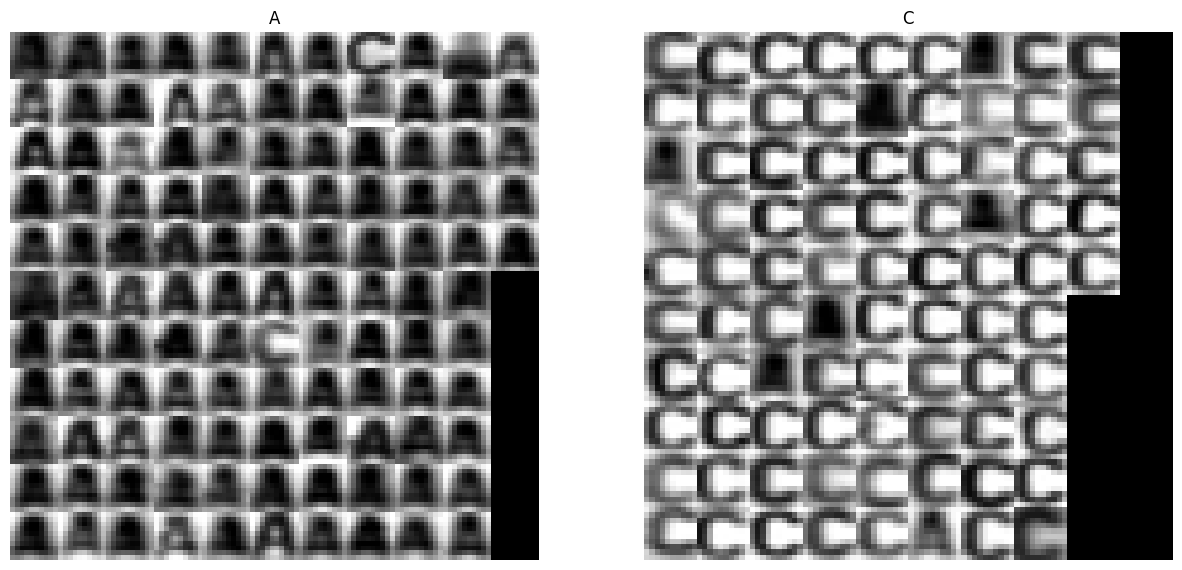

In [113]:
labels = classif.copy()
labels[labels == 1] = 0
labels[labels == -1] = 1

plt.figure(figsize=(15,10))
show_classification(tst_data['images'], labels, 'AC')
plt.savefig('ocr_svm_classif.png', dpi=300)

# Part 3: Real world example - digit classification

In [114]:
data = np.load("mnist_trn.npz", allow_pickle=True)
X_trn = data['X']
y_trn = data['y']

In [115]:
np.random.seed(42)
trn_folds, tst_folds = crossval(y_trn.size, num_folds=5)
sigmas = [0.1, 1, 10, 20, 100, 1000]
Cs = [0.01, 0.1, 1, 10]

best_params = None
best_err = np.inf
for C in Cs:
    for sigma in sigmas:
        options = {'verb': False, 't_max': float('inf'),
                   'kernel': 'rbf', 'sigma': sigma}
        err = svm_crossvalidation(trn_folds, tst_folds, X_trn, y_trn, C, options)

        if err < best_err:
            best_err = err
            best_params = (C, sigma)
        print('C {}, sigma {} -> err {}'.format(C, sigma, err))

print('best params: C={}, sigma={}'.format(best_params[0], best_params[1]))

C 0.01, sigma 0.1 -> err 0.5599999999999999
C 0.01, sigma 1 -> err 0.5599999999999999
C 0.01, sigma 10 -> err 0.5599999999999999
C 0.01, sigma 20 -> err 0.5475
C 0.01, sigma 100 -> err 0.5599999999999999
C 0.01, sigma 1000 -> err 0.5599999999999999
C 0.1, sigma 0.1 -> err 0.5599999999999999
C 0.1, sigma 1 -> err 0.5599999999999999
C 0.1, sigma 10 -> err 0.030000000000000006
C 0.1, sigma 20 -> err 0.0025
C 0.1, sigma 100 -> err 0.345
C 0.1, sigma 1000 -> err 0.5599999999999999
C 1, sigma 0.1 -> err 0.5599999999999999
C 1, sigma 1 -> err 0.5599999999999999
C 1, sigma 10 -> err 0.01
C 1, sigma 20 -> err 0.0025
C 1, sigma 100 -> err 0.0025
C 1, sigma 1000 -> err 0.5599999999999999
C 10, sigma 0.1 -> err 0.5599999999999999
C 10, sigma 1 -> err 0.5599999999999999
C 10, sigma 10 -> err 0.01
C 10, sigma 20 -> err 0.0025
C 10, sigma 100 -> err 0.0025
C 10, sigma 1000 -> err 0.23500000000000001
best params: C=0.1, sigma=20


In [116]:
C = best_params[0]
sigma = best_params[1]

options = {'verb': False, 't_max': float('inf'),
           'kernel': 'rbf', 'sigma': sigma}
model = svm(X_trn, y_trn, C, options)

In [120]:
data = np.load("mnist_tst.npz", allow_pickle=True)
X_tst = data['X']
y_tst = data['y']

In [121]:
classif = classif_svm(X_tst, model)
err = np.mean(classif != y_tst)
print(np.round(err, 8))

0.0


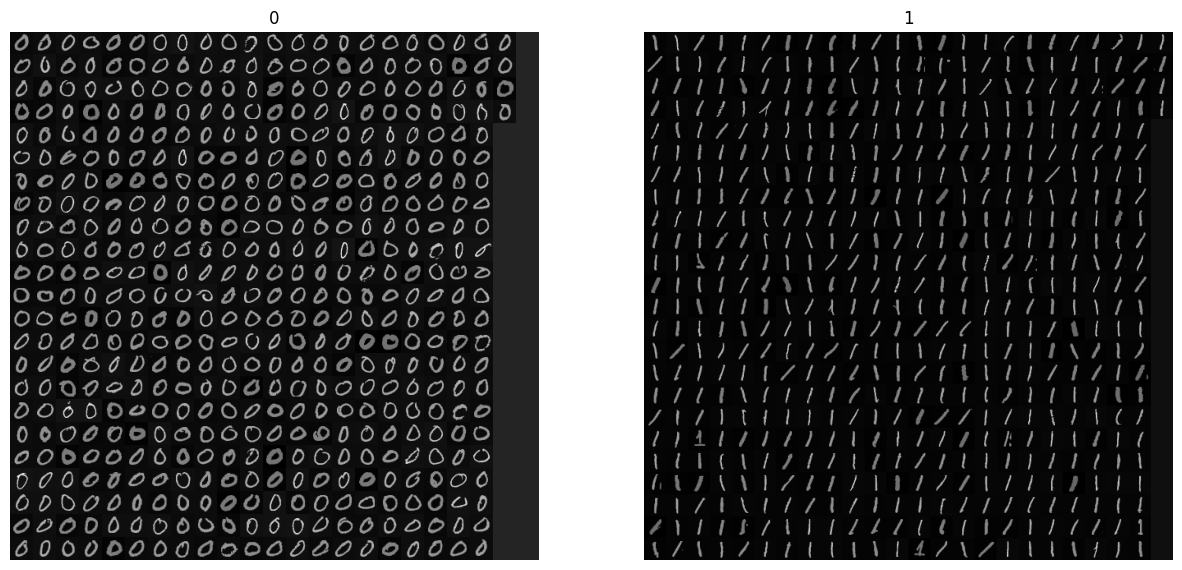

In [122]:
plt.figure(figsize=(15,10))
show_classification(X_tst.reshape(28,28,-1), classif > 0, '01')
plt.savefig('mnist_tst_classif.png', dpi=300)